In [1]:
# importing libraries

import pandas as pd # for reading data and data manipulation

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
# reading "books" dataset using "read_csv" function
df = pd.read_csv('books.csv', error_bad_lines = False)

# When there are too many fields in the data then by default an exception is raised 
# and no data frame is returned. If "error_bad_lines=False" then bad lines are dropped from dataframe

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3904\1650422836.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('books.csv', error_bad_lines = False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
# reading "books" dataset using "read_csv" function
df = pd.read_csv('books.csv', on_bad_lines='skip')

# When there are too many fields in the data then by default an exception is raised 
# and no data frame is returned. If "error_bad_lines=False" then bad lines are dropped from dataframe

In [4]:
# head of the data
df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [5]:
# columns
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
# we can observe that there is a column in the dataset called "num_pages" which have some extra spaces at the beginning.
# So, we remove those extra spaces using the strip() function
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [8]:
df.shape

(11123, 12)

In [9]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [10]:
# let's also check for the categorical columns
df.describe(include='object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [11]:
# let's describe the columns of the dataset
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [12]:
# checking for the null values
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [13]:
# let's check if there are any duplicates present in the data.

df.duplicated().any()

False

In [14]:
# Get the complete information about the data using the info() function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [15]:
# checking the unique values in "isbn13" column
df.isbn13.nunique()

11123

In [16]:
# checking the unique values in "isbn" column
df.isbn.nunique()

11123

In [17]:
# As the "bookID, isbn and isbn13" columns are unique for each row in the data.
# Therfore, they cannot help us in recommending books. So we will drop them.
df.drop(['bookID','isbn','isbn13'], axis=1, inplace = True)

In [18]:
# let's cross check the columns again
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [19]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [20]:
# Let's create a new column called "year". We will extract only the year from the publication_date
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])

In [21]:
# change the year column to int type
df['year'] = df['year'].astype('int')

In [22]:
# Let's check the minimum and maximum year
print("First year any book released ",df['year'].min())
print("Last year any book released ",df['year'].max())

First year any book released  1900
Last year any book released  2020


In [23]:
# Let's cross check whether the new column is added to the dataset or not.
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


Data Analysis and Visualisation

In [24]:
# Let's check which books were released in 2020.
df[df['year']==2020][['title','authors','average_rating','language_code','publisher']]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [25]:
# Now, let's check the top 15 years in which maximum books were published
df.groupby(['year'])['title'].agg('count').sort_values(ascending= False).head(15)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
Name: title, dtype: int64

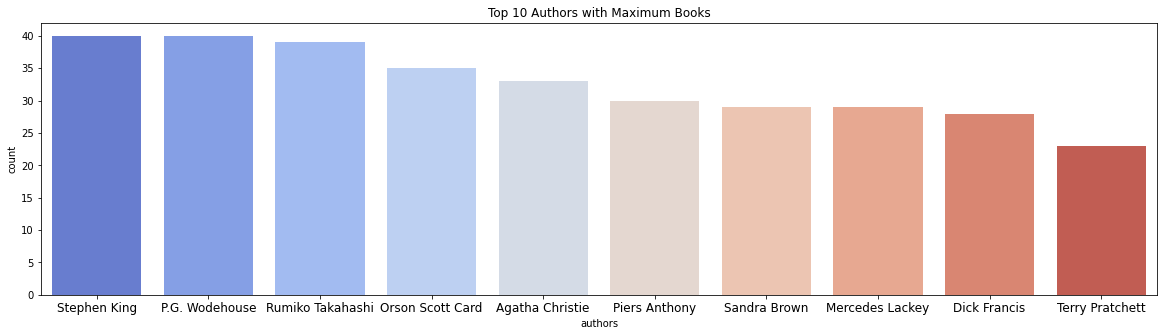

In [26]:
# Visualise the top 10 authors with maximum number of books
plt.figure(figsize=(20,5))

sns.countplot(x = "authors", data = df, 
              order = df['authors'].value_counts().iloc[:10].index, palette = "coolwarm")
plt.title("Top 10 Authors with Maximum Books")
plt.xticks(fontsize = 12)
plt.show()

In [27]:
# Checking the value counts for language_code column
df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [28]:
# Checking the means ratings_count, text_reviews_count and average_rating for each language code
df.groupby(['language_code'])[['average_rating','ratings_count','text_reviews_count']].agg('mean').style.background_gradient(cmap='Wistia')

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


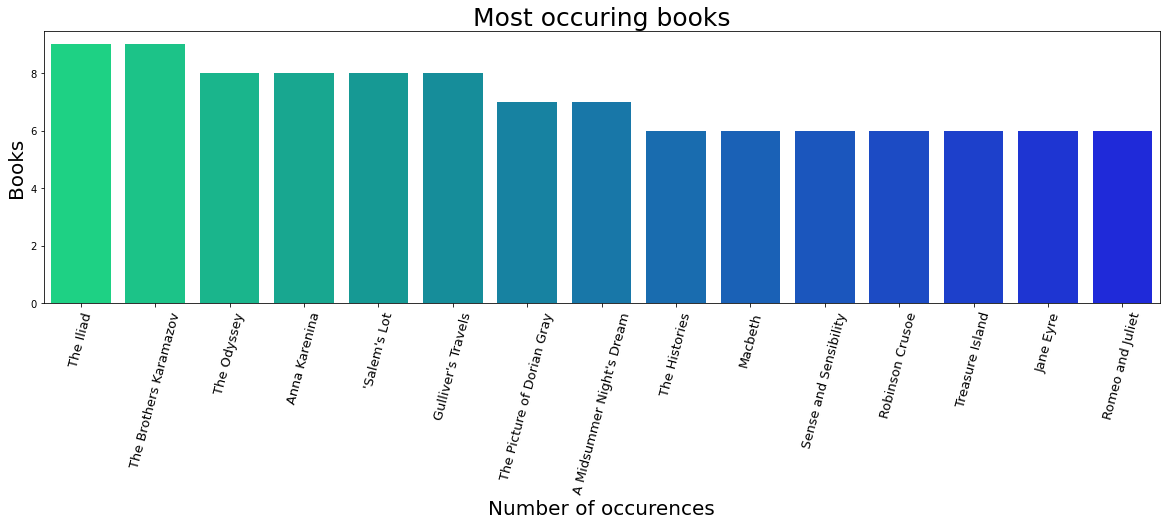

In [29]:
# Most occuring books in the data
plt.figure(figsize = (20,5))

book = df['title'].value_counts()[:15]
sns.barplot(y=book, x = book.index, palette = 'winter_r') 

plt.title("Most occuring books",fontsize = 25)
plt.xlabel("Number of occurences", fontsize = 20)
plt.ylabel("Books", fontsize = 20)
plt.xticks(rotation = 75,fontsize = 13)
plt.show()

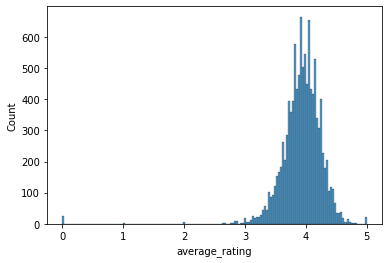

In [31]:
# distribution plot for average rating column
sns.histplot(df['average_rating'])
plt.show()

In [32]:
# books with the highest average ratings
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


In [33]:
# books with lowest average ratings
df[df.average_rating == df.average_rating.min()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,eng,Lonely Planet
375,Juiced Official Strategy Guide,Doug Walsh,eng,BradyGames
987,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,eng,Grove Press Open City Books
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,eng,Frederick P. Lenz Foundation for American Budd...
2533,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,eng,Frederick P. Lenz Foundation for American Budd...
2758,Venac sonetnih venaca; Puževa srma,Dobrica Erić,srp,"Izdavačka agencija ""Draganić"""
3492,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,eng,Macmillan
4241,American Film Guide,Frank N. Magill,eng,Salem Press Inc
4677,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,eng,Routledge
5323,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,eng,Arts Publications


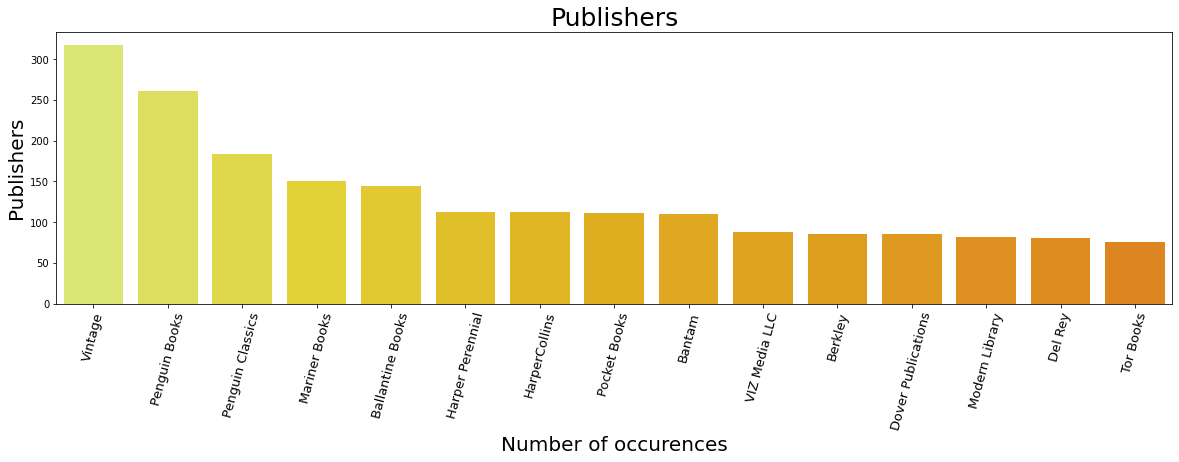

In [34]:
# Top publishers with maximum books

plt.figure(figsize = (20,5))

publisher = df['publisher'].value_counts()[:15]
sns.barplot(y=publisher, x = publisher.index, palette = 'Wistia')
plt.title("Publishers",fontsize = 25)
plt.xlabel("Number of occurences", fontsize = 20)
plt.ylabel("Publishers", fontsize = 20)
plt.xticks(rotation = 75, fontsize  =13)
plt.show()

Recommending Books based on Publishers

In [35]:
# recommending books based on publishers
def recommend_books_on_publishers(x):
    a = df[df['publisher']==x][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(10)

In [36]:
recommend_books_on_publishers('Avon')

,title,average_rating
998,Caesar (Masters of Rome #5),4.37
3475,Cat Cross Their Graves (Joe Grey #10),4.32
1005,The Grass Crown (Masters of Rome #2),4.30
9649,Bite Me If You Can (Argeneau #6),4.27
267,Cryptonomicon,4.25
949,Runaway Bride,4.25
999,Caesar's Women (Masters of Rome #4),4.25
7622,Cat Seeing Double (Joe Grey #8),4.25
3477,Cat in the Dark (Joe Grey #4),4.25
9662,A Bite to Remember (Argeneau #5),4.24


In [37]:
# interactive function for recommending books based on publishers
@interact
def recommend_books_on_publishers(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher']==publisher_name][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

Recommending Books based on Authors

In [40]:
# recommending books based on authors
@interact
def recommend_books_on_authors(author_name = list(df['authors'].value_counts().index)):
    a = df[df['authors']==author_name][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='author_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko T…

There are certain books published by different authors. So let's check ratings_count for the same book but different publishers

In [39]:
@interact
def books(x = list(df['title'].value_counts().index)):
    a = df[df['title']==x][['title','publisher','ratings_count']]
    a = a.sort_values(by = 'ratings_count', ascending = False)
    a = a.style.background_gradient(cmap = 'coolwarm')
    return a

interactive(children=(Dropdown(description='x', options=('The Iliad', 'The Brothers Karamazov', 'The Odyssey',…

In [41]:
# Let's check the book with maximum ratings_count
df[df['ratings_count']==df['ratings_count'].max()][['title','authors','ratings_count']]

,title,authors,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,4597666


In [42]:
# Now, let's check the top 10 books with highest ratings_count
df[['title','authors','ratings_count']].sort_values(by = 'ratings_count',ascending = False).head(10).style.background_gradient(cmap = 'coolwarm')

,title,authors,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,4597666
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,2530894
1462,The Catcher in the Rye,J.D. Salinger,2457092
307,Angels & Demons (Robert Langdon #1),Dan Brown,2418736
3,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,2339585
4415,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling/Mary GrandPré,2293963
1,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,2153167
23,The Fellowship of the Ring (The Lord of the Rings #1),J.R.R. Tolkien,2128944
2114,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,2111750
0,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,2095690


Recommending Books on Languages

In [44]:
# Let's recommend books based on languages
@interact
def recommend_books_on_languages(language = list(df['language_code'].value_counts().index)):
    a = df[df['language_code']==language][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(15)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

In [45]:
# converting average rating column into categorical column
def num_into_obj(x):
    if x>=0 and x<=1:
        return 'between 0 and 1'
    elif x>1 and x<=2:
        return 'between 1 and 2'
    elif x>2 and x<=3:
        return 'between 2 and 3'
    elif x>3 and x<=4:
        return 'between 3 and 4'
    else:
        return 'between 4 and 5'
    
df['rating_obj'] = df['average_rating'].apply(num_into_obj)

In [46]:
df['rating_obj'].value_counts()

between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 0 and 1      27
between 1 and 2       7
Name: rating_obj, dtype: int64

In [47]:
# Let's encode the categorical column
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [48]:
# Let's encode the language code column as well
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Let's concat both the data frames and set the title column as the index 
features = pd.concat([rating_df, language_df, df['average_rating'], df['ratings_count'],df['title']], axis=1)
features.set_index('title', inplace=True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [50]:
# for scaling the values of the data frame
from sklearn.preprocessing import MinMaxScaler

In [51]:
# scaling down the values of the data frame
min_max_scaler = MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)

In [52]:
# importing neighbours
from sklearn import neighbors

In [53]:
# training the model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree', metric='euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [54]:
@interact
def BookRecommender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…